Load necessary libraries.

In [ ]:
## Basics
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## ML Packages
import umap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.manifold import MDS

## Msc
from adjustText import adjust_text
from itertools import combinations

## Basics
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## ML Packages
import umap
from sklearn.decomposition import FastICA, NMF, KernelPCA, PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import SpectralEmbedding
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import MDS, SpectralEmbedding
import umap.umap_ as umap

## Msc
from adjustText import adjust_text
from itertools import combinations

Load dataset.

In [4]:
df = pd.read_csv('00_authors.csv').rename(columns = {'Unnamed: 0': 'Author'}).drop(columns = 'BookID')
X = df.copy().drop(['Author'], axis=1)
authors = df["Author"].values

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


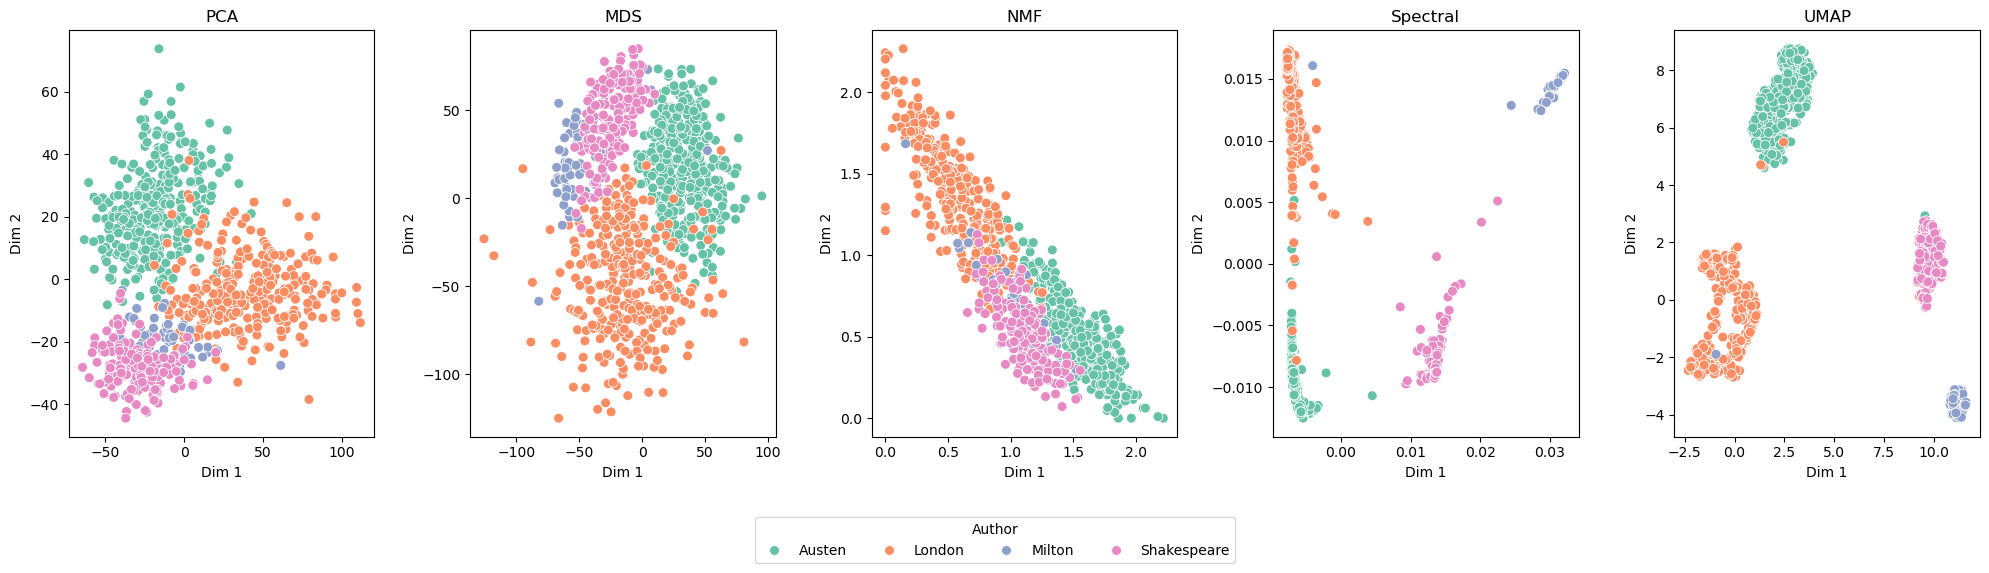

In [5]:
methods = {
    "PCA": PCA(n_components=2),
    "MDS": MDS(n_components=2, random_state=42),
    "NMF": NMF(n_components=2, random_state=42, max_iter=1000),
    "Spectral": SpectralEmbedding(n_components=2, affinity="nearest_neighbors", n_neighbors=10, random_state=42),
    "UMAP": umap.UMAP(n_components=2, random_state=42)
}

palette = {
    "Austen": "#66c2a5",
    "London": "#fc8d62",
    "Milton": "#8da0cb",
    "Shakespeare": "#e78ac3"
}

embeddings = {name: model.fit_transform(X) for name, model in methods.items()}

fig, axs = plt.subplots(1, len(embeddings), figsize=(20, 5))
for ax, (name, embed) in zip(axs, embeddings.items()):
    sns.scatterplot(x=embed[:,0], y=embed[:,1], hue=authors, palette=palette, s=50, ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Dim 1"); ax.set_ylabel("Dim 2")
    ax.legend().remove()
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Author", loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15))